# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here

import pandas as pd
import numpy as np


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [16]:
# your answer here

employee = pd.read_csv("/Users/caionunez/Desktop/Ironhack/Week4/lab-pivot-table-and-correlation/your_code/data/Employee.csv")
print(employee.shape)
employee.head()

(9, 7)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [4]:
# Method 1 with groupby
# your answer here

employee.groupby("Department").agg({"Salary": "mean"})


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [10]:
# Method 2 with pivot tables
# your answer here

employee.pivot_table(index = ["Department"], values = ["Salary"])


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [12]:
# your answer here

employee.pivot_table(index = ["Department", "Title"], values = ["Salary"])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [13]:
# your answer here

# I didn't understand if the department should remain in this, but I'll do it both ways.

# First with Department

employee.pivot_table(index = ["Department", "Title"], values = ["Salary","Years"])

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

In [14]:
# Now with just title

employee.pivot_table(index = ["Title"], values = ["Salary","Years"])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [17]:
# your answer here

employee.pivot_table(index = ["Department", "Title"], values = ["Salary","Years"], aggfunc = {"Salary":"mean","Title":"count"})

#I don't understand if this was the expected output or not.

Salary  Title
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [19]:
# your answer here

employee.pivot_table(index = ["Department", "Title"], values = ["Salary"], aggfunc = {"Salary":["median","min","max","std"]})


### From what I understand the field std has null values as there is only one person with that title
## in that department, therefore there is no deviation. That is also why max, median and min are the same.

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60       NaN
Sales      associate     55   55.0  55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [23]:
# your answer here

# Considering that, I believe the appropriate would be to fill those NaNs with 0.

pivot = employee.pivot_table(index = ["Department", "Title"], values = ["Salary"], aggfunc = {"Salary":["median","min","max","std"]})
pivot.fillna(0, inplace=True)
pivot

# I stored the pivot in a new dataframe, don't know if I can fill NAs without doing that.

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [35]:
# your answer here


employee.pivot_table(index = ["Department"], values = ["Salary","Name"], aggfunc = {"Salary":"sum","Name":"count"})


,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [36]:
# your answer here

employee.pivot_table(index = ["Department","Title"], values = ["Years","Salary"], aggfunc = {"Years":"sum","Salary":"mean"})

## Not sure if it makes sense to give a sum of years of experience by title (rather than by individual)
# but this is what I understand from the exercise. 


Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [38]:
# your answer here

## I need help with this :)

#employee.pivot_table(index = ["Department"], values = ["Salary"], aggfunc = {"Salary":"mean"})

SyntaxError: cannot assign to function call (2946640677.py, line 4)

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [37]:
# your answer here

fitbit = pd.read_csv("/Users/caionunez/Desktop/Ironhack/Week4/lab-pivot-table-and-correlation/your_code/data/Fitbit.csv")
print(fitbit.shape)
fitbit.head()

(367, 14)


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [42]:
# your answer here

fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [41]:
# your answer here

fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [43]:
# your answer here

fitbit["Minutes Very Active"].corr(fitbit["Steps"])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

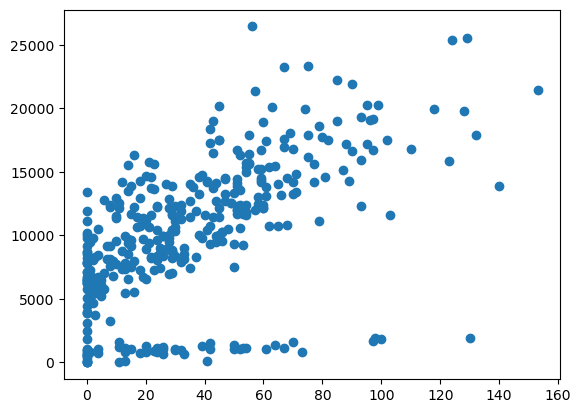

In [47]:
# your answer here

import matplotlib.pyplot as plt

plt.scatter(x = fitbit["Minutes Very Active"], y = fitbit["Steps"])
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here

#It appears to be a relation between a higher number of minutes very active and a higher number of steps

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [48]:
# your answer here

fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

0.07690608062990092

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

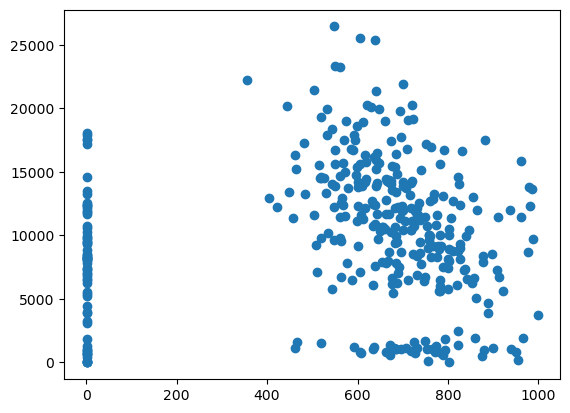

In [49]:
# your answer here

plt.scatter(x = fitbit["Minutes Sedentary"], y = fitbit["Steps"])
plt.show()

#The variables seem less related than the previous ones. No clear trend between both

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [50]:
# your answer here

fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

0.13098565950836386

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

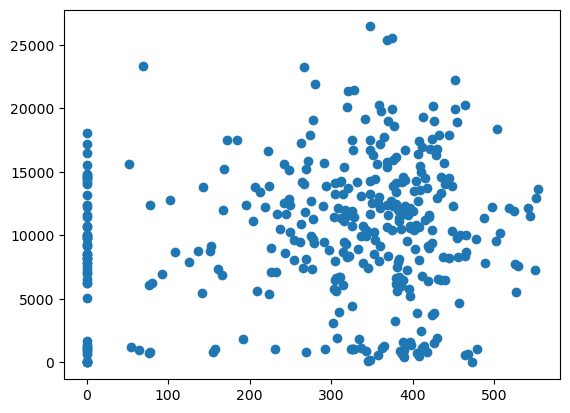

In [51]:
# your answer here

plt.scatter(x = fitbit["MinutesOfSleep"], y = fitbit["Steps"])
plt.show()

# It also doesn't seem to exist a correlation between more minutes of sleep and steps. 
# It's stronger than the previous one with sedentary minutes, but still doesn't seem significant.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [58]:
# your answer here

column = ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

fitbit2 = fitbit[columns]
cor_fit = fitbit2.corr()
cor_fit 

# Checking if correlation worked

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


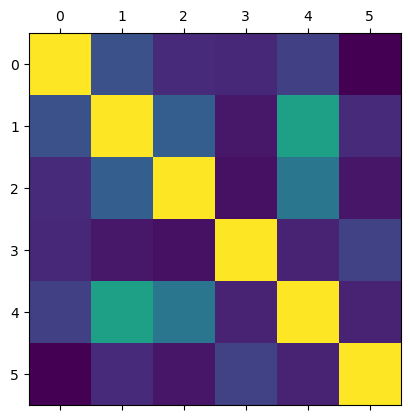

In [59]:
plt.matshow(cor_fit)
plt.show()

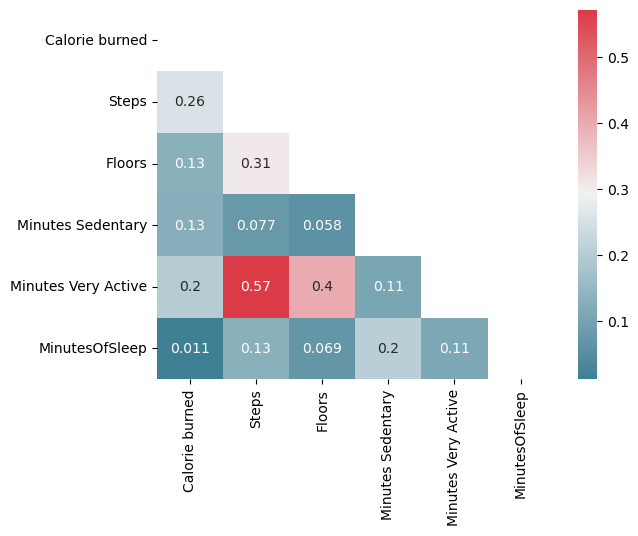

In [60]:
#I'll follow the steps from the lesson and create a heatmap as I think visualization is clearer

corr = cor_fit
mask = np.triu(np.ones_like(cor_fit,dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(cor_fit, mask = mask, cmap = cmap, annot = True)
plt.show()

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [61]:
# your answer here

# From the matrix, only Minutes Very Active shows a stronger correlation with the variable Steps.

# The variable floors, in comparison to the remaining ones, also deserves to be noted, although the relationship is not strong.

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [62]:
# your answer here

time_grades = pd.read_csv("/Users/caionunez/Desktop/Ironhack/Week4/lab-pivot-table-and-correlation/your_code/data/Time_Grades.csv")
print(time_grades.shape)
time_grades.head()

(15, 3)


,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

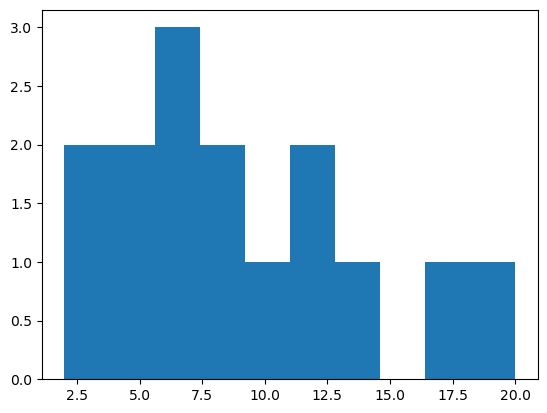

In [69]:
# your answer here

plt.hist(time_grades['Study time'])
plt.show()

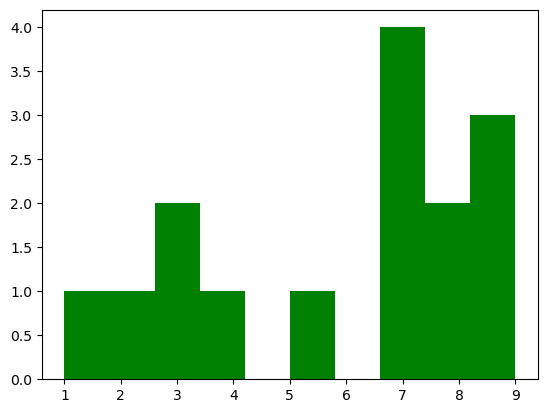

In [71]:
plt.hist(time_grades['Grade'], color = "g")
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [76]:
# your answer here

from scipy import stats

print("Pearson correlation is ", stats.pearsonr(time_grades['Study time'], time_grades['Grade'])[0])
print("Spearman correlation is ", stats.spearmanr(time_grades['Study time'], time_grades['Grade'])[0])

### To be honest I don't remember what the [0] is doing in that snippet of code, but the output was not making sense 
## without it, so I went back to the lesson and picked it up.


# Pearson refers/measures linear relationship between two variables. Spearman concentrates more on whether 
# the data is moving in the same or the opposite direction, considering the "ranks" of datapoints, and not
# their absolute value.

# In this dataset, both have strong values, although Spearman is slightly higher. In the scatter below
# we can kind of visualize this, as the dots move to the same direction slightly "more" than necessarily
# following a line (if that makes sense)

Pearson correlation is  0.7980456073578858
Spearman correlation is  0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

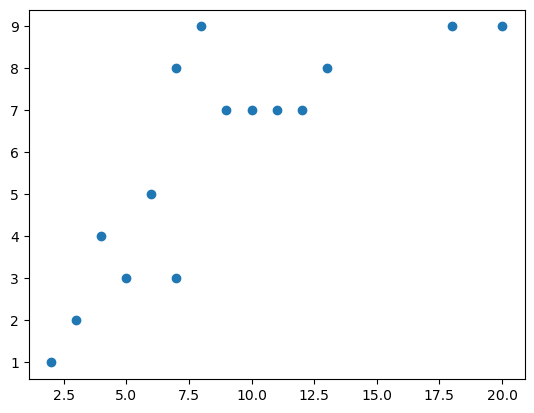

In [77]:
# your answer here

plt.scatter(x = time_grades['Study time'], y = time_grades['Grade'])
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here

# It's more or less explained in my comments about the data.